In [1]:
# DEFINICOES DO USUARIO

pasta_raiz = 'Z:/ColetaLogs/Arquivos'
subestacao = 'ITJ'
equipamento = 'ITJ_LTITA-1_AMPC'
ano = '2021'

In [ ]:
# subestacao = 'BLU'
# equipamento = 'BLU_LTBIG_AMPA'
# ano = '2021'

# subestacao = 'ITJ'
# equipamento = 'ITJ_LTBLU-2_AMPB'
# ano = '2021'

# subestacao = 'ABT'
# equipamento = 'ABT_LTCNO_AMPA'
# ano = '2020'

In [2]:
import os
import time
import matplotlib.pyplot as plt

In [3]:
def plot_maximos(maximos):
    plt.figure(figsize=(15,10))
    plt.plot(maximos, 'r')
    plt.ylim(bottom=-2)
    plt.show()

In [4]:
# FUNÇÃO QUE RETORNA O VALOR MÁIXMO PARA DADA SE E EQUIPAMENTO
def acha_maximos_se(pasta_raiz, subestacao, equipamento, ano):
    pasta_raiz = pasta_raiz
    subestacao = subestacao
    equipamento = equipamento
    ano = ano
    caminho = pasta_raiz + '/' + subestacao + '/ucs1' + '/' + ano # concatenação
    
    lista_arquivos = [] # vetor que conterá os caminhos para todos os arquivos "pas"

    for diretorio, subpastas, arquivos in os.walk(caminho): # gera vetor com todos os caminhos para arquivos "pas"
        for arquivo in arquivos:
            if arquivo[-3:] == 'pas':
                lista_arquivos.append((os.path.join(diretorio, arquivo).replace('\\','/'))) # adiciona caminho na lista
    
    max_atual = -1000000
    min_atual = 1000000
    maximos_diarios = [] # vetor para guardar os valores máximos de todos os dias do ano
    for arquivo in lista_arquivos: # para cada arquivo da lista:
        valores_diarios = []
        print('*', end='') # vai imprimindo uns asteriscos, pra não dar ansiedade
        with open(arquivo, "r") as inp:
            linhas = inp.readlines()

            for i in range(len(linhas)):
                linhas[i] = linhas[i].strip().replace('*','0.0') # em cada linha, tira espaços em branco e substitui * por 0.0

            # PROCURA O OFFSET
            n=-2 # começa com -2 para não considerar as 2 linhas inúteis no início do arquivo
            offset=0
            for l in linhas: # para cada linha:
                if equipamento in l: # se o equipamento desejado está contido nesta linha
                    offset=n
                n+=1
            
            # PROCURA OS INICIOS DE CADA BLOCO DE DADOS
            n=0
            marcadores=[] # vetor para armazenar as linhas de interesse no arquivo
            for l in linhas: 
                if l.startswith('h'): # se a linha começa com h
                    marcadores.append(n) # adiciona marcador (número da linha) na lista
                n+=1

            # PERCORRE OS BLOCOS DE DADOS PEGANDO OS VALORES DE INTERESSE
            valores=[] # vetor para armazenar os valores encontrados
            for m in marcadores: # para cada marcador m:

                # se quiser considerar 3 fases; daria pra fazer um for, mas assim é mais didático
                valores.append(float(linhas[m + 1 + offset])) # fase A; adiciona valor na lista
                valores_diarios.append(float(linhas[m + 1 + offset])) # fase A; adiciona valor na lista
                #valores.append(float(linhas[m + 2 + offset])) # fase B
                #valores.append(float(linhas[m + 3 + offset])) # fase C

            # ATUALIZA VALOR MÁXIMO
            if max_atual < max(valores):
                max_atual = max(valores)
                
            # ATUALIZA VALOR MÍNIMO
            if min_atual > min(valores):
                min_atual = min(valores)
                
            # GUARDA VALOR MÁXIMO DIÁRIO
            maximos_diarios.append(max(valores_diarios))
                
    print()
    print('Número de arquivos analisados: ', len(lista_arquivos))            
    print(f'Valor máximo encontrado para o equipamento "{equipamento}", na subestação "{subestacao}", para {ano}: {max_atual}')
    print(f'Valor mínimo encontrado para o equipamento "{equipamento}", na subestação "{subestacao}", para {ano}: {min_atual}')
    plot_maximos(maximos_diarios)

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Número de arquivos analisados:  364
Valor máximo encontrado para o equipamento "ITJ_LTITA-1_AMPC", na subestação "ITJ", para 2021: 289.0
Valor mínimo encontrado para o equipamento "ITJ_LTITA-1_AMPC", na subestação "ITJ", para 2021: 0.0


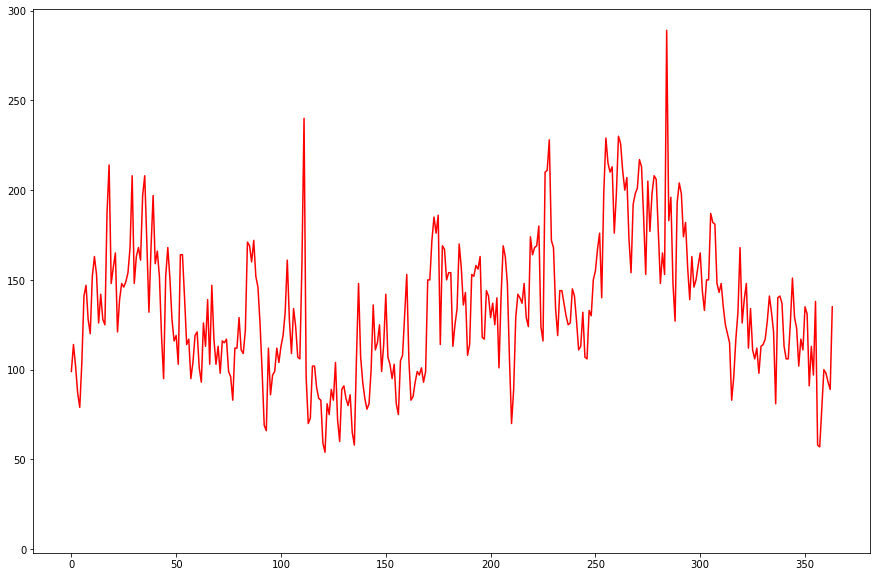

Tempo gasto: 1.0 min e 18.89 s


In [5]:
# AQUI SERIA O "MAIN"

# guarda os instantes antes e depois da função, para calcular a demora na execução
ini = time.time()
acha_maximos_se(pasta_raiz, subestacao, equipamento, ano)
fim = time.time()

duracao = fim - ini # instante final - instante inicial

if duracao >= 60:
    minutos, segundos = divmod(duracao, 60)
    print(f'Tempo gasto: {minutos} min e {segundos:.2f} s')
else:
    print(f'Tempo gasto: {duracao:.2f} s')